# UTS MACHINE LEARNING

Nama: Ananda Galih Pratiwi

Kelas: TI - 3F

Absen: 05

NIM: 2141720045

#KETENTUAN UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

## Import Library

In [1]:
# Impor library
import numpy as np  # Impor library NumPy untuk operasi numerik.
import cv2  # Impor OpenCV untuk pengolahan gambar.
import matplotlib.pyplot as plt  # Impor Matplotlib untuk visualisasi.
from google.colab.patches import cv2_imshow  # Impor cv2_imshow dari Google Colab untuk menampilkan gambar.
from sklearn.cluster import KMeans  # Impor KMeans dari scikit-learn untuk pengelompokan data.
import os  # Impor modul os untuk fungsi sistem operasi.
import random  # Impor modul random untuk menghasilkan angka acak.
import matplotlib.pyplot as plt  # Impor Matplotlib lagi untuk visualisasi.

## Load Dataset & Menampilkan Gambar Original

In [2]:
# Impor modul drive dari Google Colab untuk menghubungkan dan mengakses Google Drive.
from google.colab import drive
# Mount atau sambungkan Google Drive ke lokasi '/content/drive' dalam lingkungan Colab.
drive.mount('/content/drive')

Mounted at /content/drive


## Memilih 5 gambar setiap anggota, Dihasilkan 15 gambar yang dipilih secara random

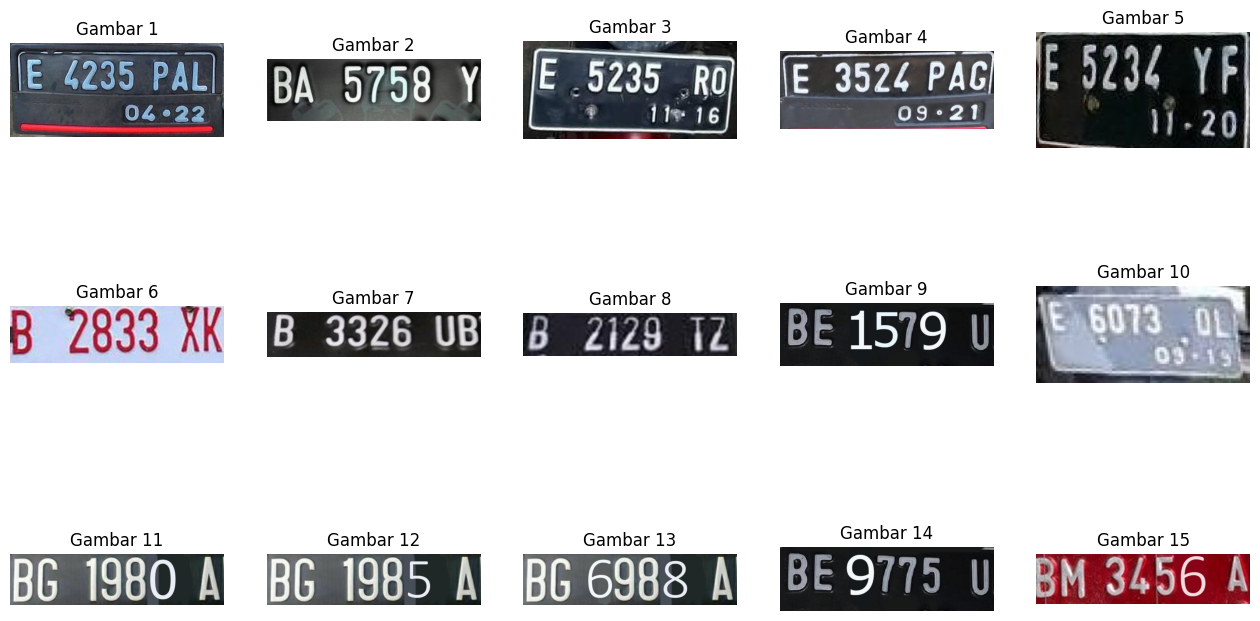

In [4]:
# Path direktori yang berisi gambar-gambar dataset.
direct_data = '/content/drive/MyDrive/College/05 - Semester 5/ML/dummy'

# Inisialisasi list untuk menyimpan path gambar yang dipilih.
selected_images = []

# Mendapatkan daftar file gambar dalam direktori dataset.
image_files = [os.path.join(direct_data, file) for file in os.listdir(direct_data)]

# Memilih secara acak 15 gambar dari daftar gambar yang tersedia.
num_images_to_select = 15
selected_images = random.sample(image_files, num_images_to_select)

# Inisialisasi subplot untuk menampilkan gambar dalam 3 baris dan 5 kolom.
fig, ax = plt.subplots(3, 5, figsize=(16, 9))

for i, image_path in enumerate(selected_images):
    # Membaca gambar dari path.
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Menentukan baris dan kolom untuk tampilan gambar.
    row = i // 5
    col = i % 5

    # Menampilkan gambar di subplot yang sesuai.
    ax[row, col].imshow(image)
    ax[row, col].set_title(f'Gambar {i+1}')
    ax[row, col].axis('off')

# Menampilkan semua gambar yang dipilih.
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Informasi Tinggi, Lebar, dan Saluran Warna

In [6]:
for i, image_path in enumerate(selected_images):
    image = cv2.imread(image_path)
    h, w, ch = image.shape
    print(f"Gambar {i+1} - Tinggi: {h}, Lebar: {w}, Saluran Warna: {ch}")

Gambar 1 - Tinggi: 166, Lebar: 380, Saluran Warna: 3
Gambar 2 - Tinggi: 343, Lebar: 1183, Saluran Warna: 3
Gambar 3 - Tinggi: 120, Lebar: 264, Saluran Warna: 3
Gambar 4 - Tinggi: 165, Lebar: 455, Saluran Warna: 3
Gambar 5 - Tinggi: 83, Lebar: 153, Saluran Warna: 3
Gambar 6 - Tinggi: 304, Lebar: 1151, Saluran Warna: 3
Gambar 7 - Tinggi: 161, Lebar: 778, Saluran Warna: 3
Gambar 8 - Tinggi: 217, Lebar: 1064, Saluran Warna: 3
Gambar 9 - Tinggi: 213, Lebar: 716, Saluran Warna: 3
Gambar 10 - Tinggi: 41, Lebar: 90, Saluran Warna: 3
Gambar 11 - Tinggi: 324, Lebar: 1366, Saluran Warna: 3
Gambar 12 - Tinggi: 324, Lebar: 1366, Saluran Warna: 3
Gambar 13 - Tinggi: 324, Lebar: 1366, Saluran Warna: 3
Gambar 14 - Tinggi: 213, Lebar: 716, Saluran Warna: 3
Gambar 15 - Tinggi: 258, Lebar: 1101, Saluran Warna: 3


## Bentuk Data Pixel

In [7]:
for i, image_path in enumerate(selected_images):
    # Membaca gambar
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, ch = image.shape

    # Normalisasi nilai piksel menjadi rentang [0, 1]
    data = image / 255.0

    # Reshape data piksel menjadi format yang dapat diolah oleh K-Means
    data = data.reshape(h * w, ch)

    # Cetak bentuk data piksel yang telah diolah
    print(f"Bentuk gambar ke-{i+1}:", data.shape)


Bentuk gambar ke-1: (63080, 3)
Bentuk gambar ke-2: (405769, 3)
Bentuk gambar ke-3: (31680, 3)
Bentuk gambar ke-4: (75075, 3)
Bentuk gambar ke-5: (12699, 3)
Bentuk gambar ke-6: (349904, 3)
Bentuk gambar ke-7: (125258, 3)
Bentuk gambar ke-8: (230888, 3)
Bentuk gambar ke-9: (152508, 3)
Bentuk gambar ke-10: (3690, 3)
Bentuk gambar ke-11: (442584, 3)
Bentuk gambar ke-12: (442584, 3)
Bentuk gambar ke-13: (442584, 3)
Bentuk gambar ke-14: (152508, 3)
Bentuk gambar ke-15: (284058, 3)


## Visualisasi Data Warna

In [8]:
# Mendefinisikan fungsi plot_pixels dengan parameter data, title, colors, dan N
def plot_pixels(data, title, colors=None, N=10000):
    # Jika tidak ada daftar warna yang diberikan, gunakan data warna
    if colors is None:
        colors = data

    # Buat generator angka acak dengan seed 0
    rng = np.random.RandomState(0)

    # Pilih subset data berdasarkan indeks acak
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]

    # Pisahkan komponen warna (R, G, B)
    R, G, B = data[i].T

    # Buat plot scatter plot dengan komponen warna
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))


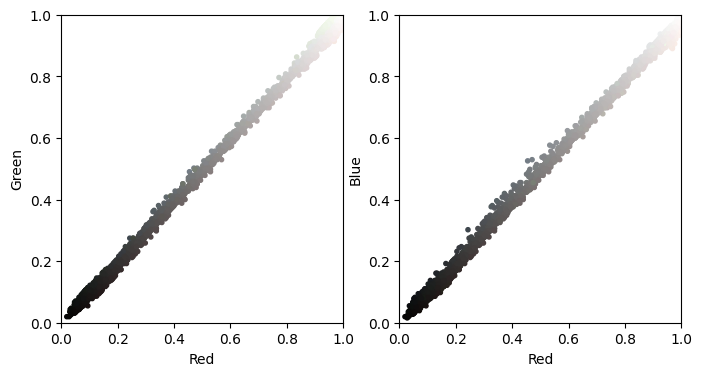

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

## Proses Segmentasi , Klasterisasi dan Hasil Segmentasi

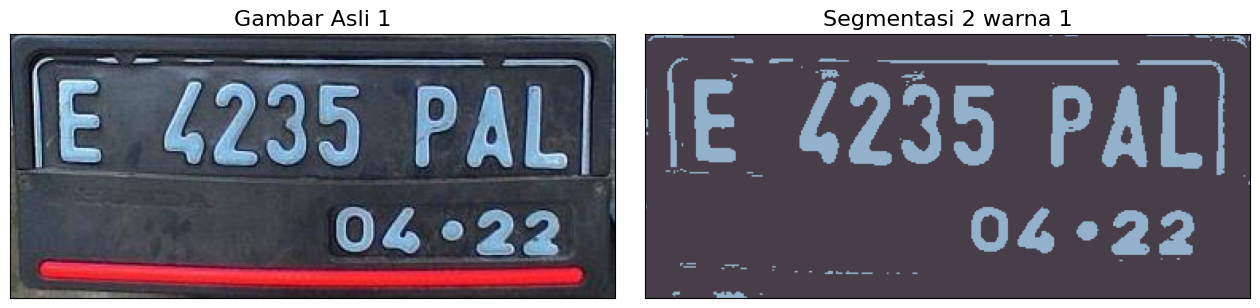

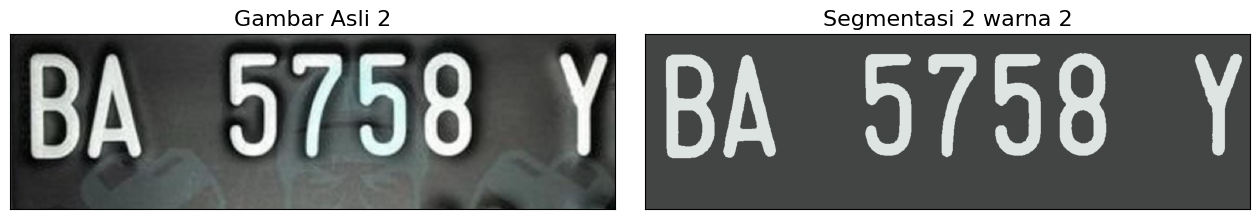

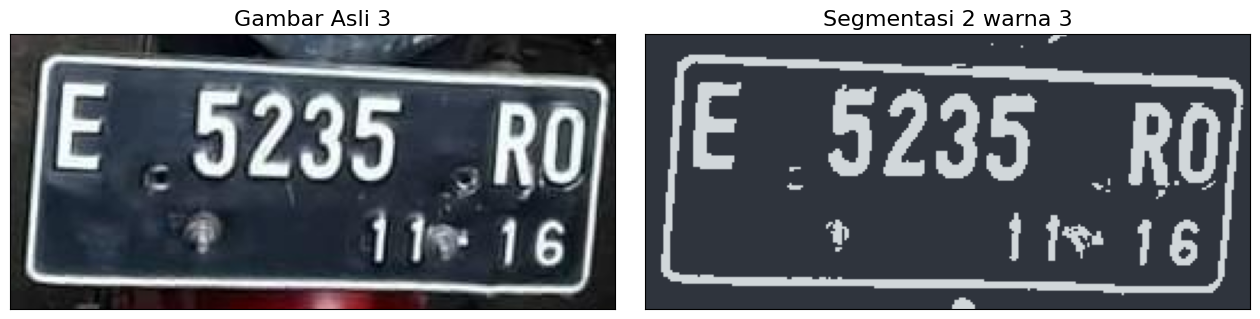

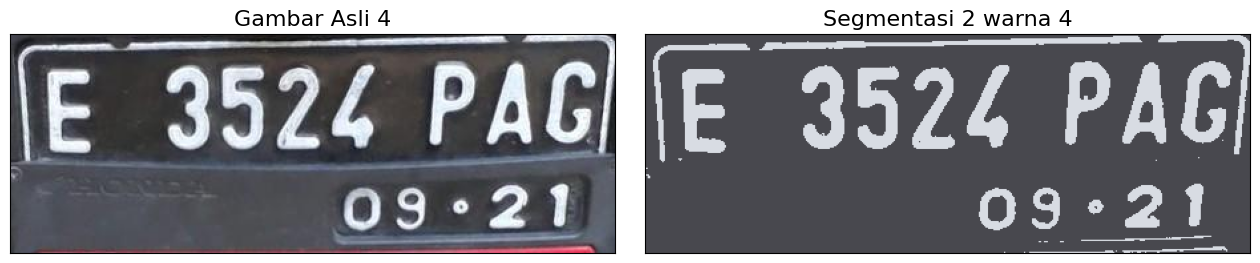

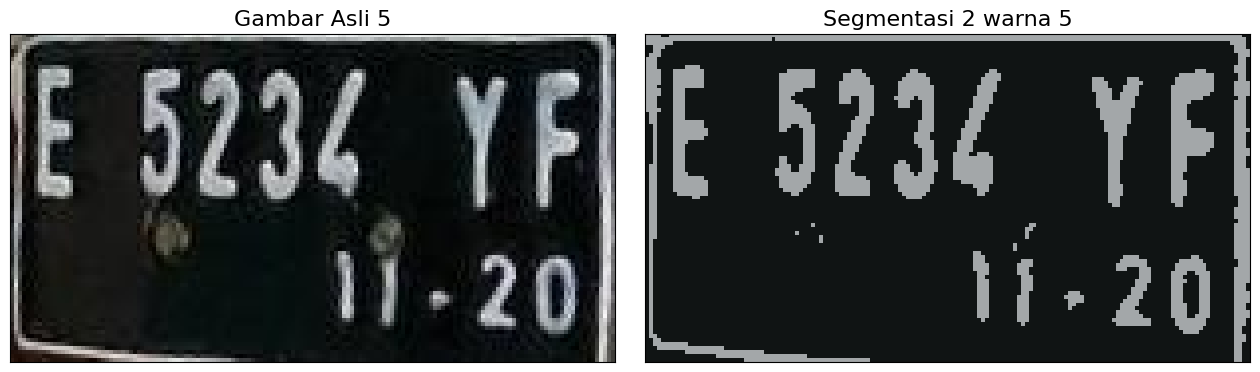

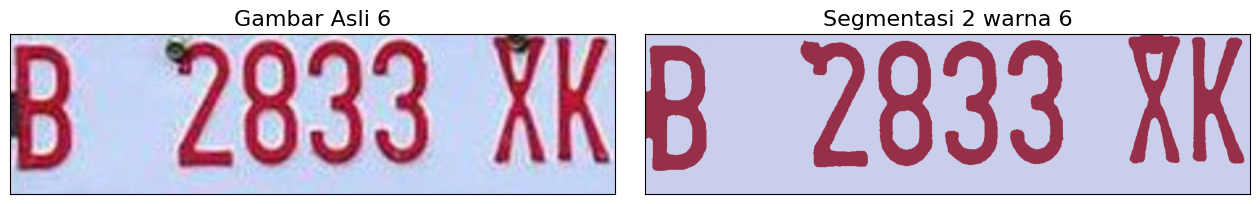

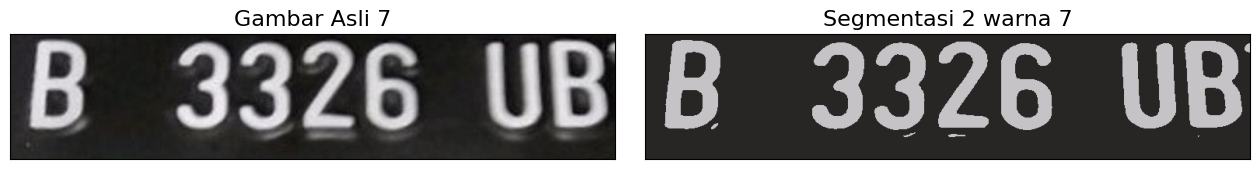

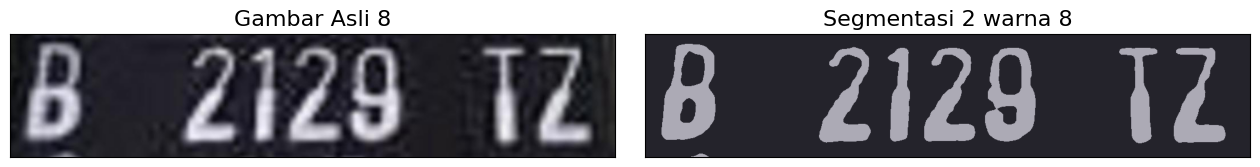

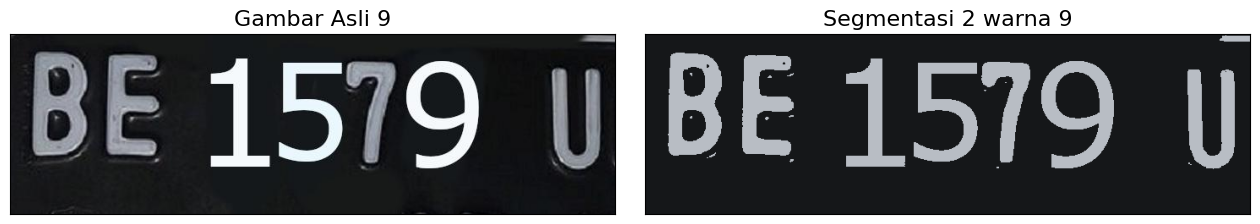

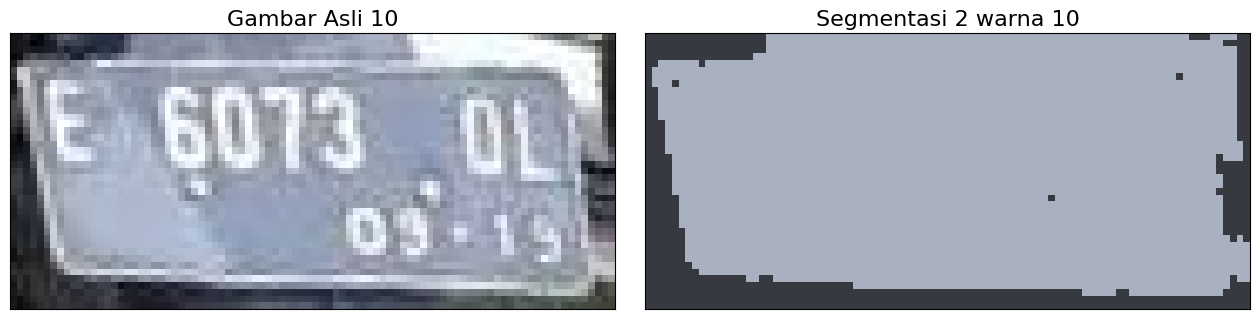

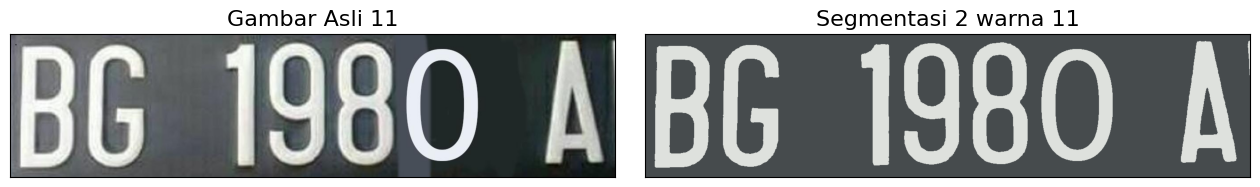

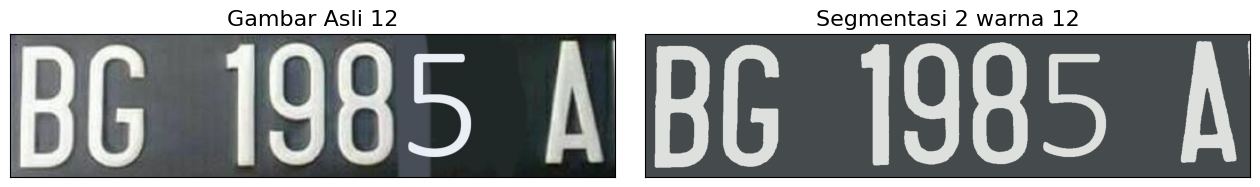

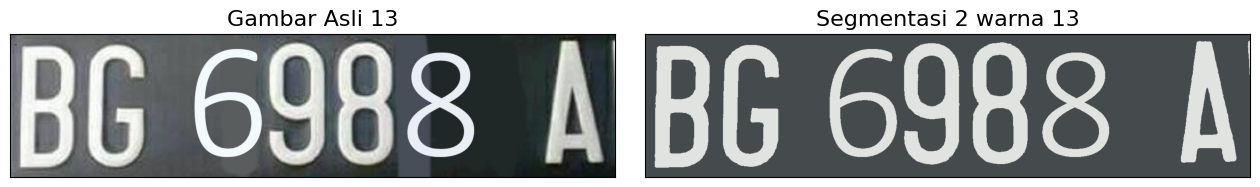

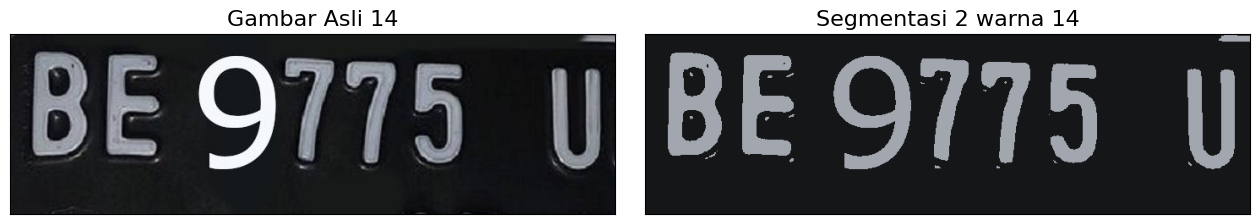

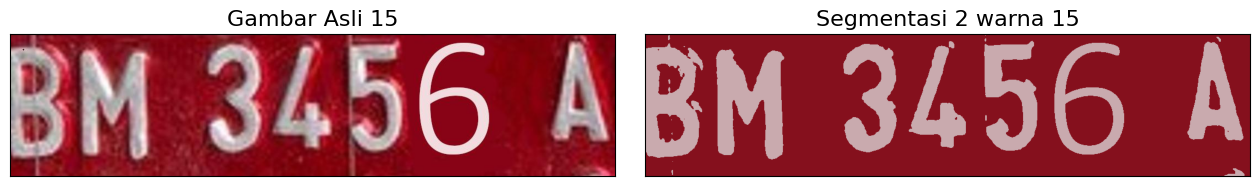

In [9]:
for i, image_path in enumerate(selected_images):
    # Baca gambar yang dipilih
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Preprocessing sesuai dengan Kmeans
    h, w, ch = image.shape

    # Ubah gambar menjadi format yang dapat diolah oleh K-Means
    data = image.reshape(-1, 3)

    # Definisikan model K-Means dengan 2 cluster (2 warna)
    kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

    # Fit data ke model K-Means
    kmeans.fit(data)

    # Mendapatkan nilai titik tengah dari setiap cluster
    cluster_centers = kmeans.cluster_centers_

    # Tambahkan inisialisasi new_colors
    new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

    # Tampilkan gambar asli dan gambar hasil segmentasi 2 warna
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)

    # Tampilkan gambar asli
    ax[0].imshow(image)
    ax[0].set_title(f'Gambar Asli {i+1}', size=16)

    # Tampilkan gambar hasil segmentasi
    ax[1].imshow(new_colors.astype(np.uint8))
    ax[1].set_title(f'Segmentasi 2 warna {i+1}', size=16)

    plt.show()
